## Exercise 1 - Bayes classification system

In [1]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [10]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [11]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [4]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [24]:
# TODO: Compute the priors
P_C0 = len(y_train[y_train == 0]) / len(y_train)
P_C1 = len(y_train[y_train == 1]) / len(y_train)

print(f'P(C0) = {P_C0}')
print(f'P(C1) = {P_C1}')

P(C0) = 0.4
P(C1) = 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

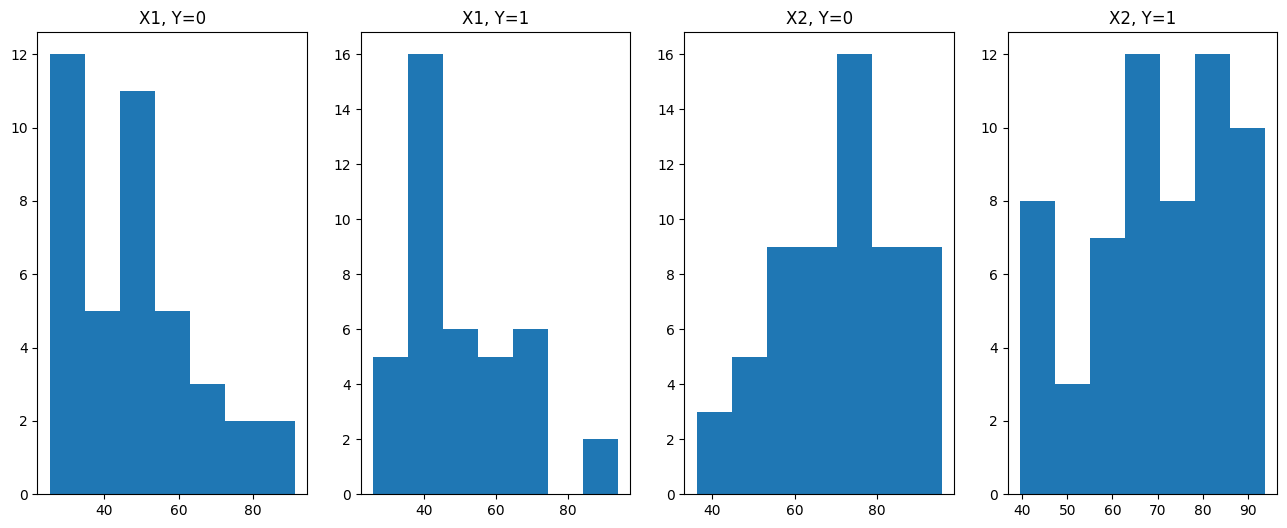

In [38]:
# TODO: Compute histograms from X_train for each class
histograms = [
    np.histogram(X_train[y_train == 0]["x1"], bins='auto'),
    np.histogram(X_train[y_train == 0]["x2"], bins='auto'),
    np.histogram(X_train[y_train == 1]["x1"], bins='auto'),
    np.histogram(X_train[y_train == 1]["x2"], bins='auto')
]

# TODO: plot all histograms
plt.figure(figsize=(16,6))

for i, (hist, bins) in enumerate(histograms):
    plt.subplot(1, 4, i + 1)
    plt.bar(bins[:-1], hist, width = bins[1] - bins[0])
    plt.title(f'X{i // 2 + 1}, Y={i % 2}')

plt.show()

In [31]:
np.histogram(X_train[y_train == 0]["x1"])

(array([11,  4,  4,  9,  3,  3,  2,  2,  0,  2]),
 array([30.05882245, 36.63909571, 43.21936897, 49.79964223, 56.3799155 ,
        62.96018876, 69.54046202, 76.12073528, 82.70100855, 89.28128181,
        95.86155507]))

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [7]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: Compute the likelyhood that x exists using the histogram and its edge points
    return hist_values[np.digitize(x, bin_edges)] / np.sum(hist_values)


e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [8]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [9]:
# TODO: predict on test set in the 3 cases described above

y_pred = []

...

accuracy_score(y_test, y_pred)

ValueError: operands could not be broadcast together with shapes (100,) (0,) 

Which system is the best ?

TODO: answer

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [ ]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs

    return ...

In [ ]:
# TODO: Compute mean and variance for each classes and each features (8 values)



In [ ]:
# TODO: predict on test set in the 3 cases

y_pred = []

...

accuracy_score(y_test, y_pred)